<a href="https://colab.research.google.com/github/abdulom4/Astronomy/blob/main/Hubble_constant_using_Type_1a_Supernova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # This imports numpy which allows you to use arrays
import matplotlib.pyplot as plt # This imports matplotlib which allows you to use plots.

In [2]:
import astropy.io.ascii # This allows you to read in data such as files
import astropy.units as u # This allows you to use astropy units and simplifying the name as u
import astropy.constants as ac # This allows you to use astropy constants and you also name it ac to simplify when using it

Hubble Constant = $H_0$ = $\frac{v}{D}$

Age of the Universe is:
$\frac{1}{H_0}$


In [3]:
from google.colab import files # This allows you to upload files to colab
uploaded = files.upload() # This allows you to upload files to colab

Saving Tonry_2003.vot to Tonry_2003.vot


In [4]:
data = astropy.io.ascii.read('Tonry_2003.vot') # This reads in the data from the file
print(data) # This prints the data that wasa read in above


/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


  col1     col2    col3   col4    col5    col6  col7  col8  col9  col10    col11  
-------- ------- ------- ------ -------- ----- ----- ----- ----- -------- --------
 SN1972E  314.84   30.08 0.0023    N5253    16 2.839 2.399 0.033 204.9697 -31.6692
 SN1980N 240.161 -56.689 0.0056    N1316     9 3.225  3.14 0.043  50.6753 -37.2074
 SN1981B  292.97  64.743 0.0072    N4536     2 3.334 3.077 0.041 188.6233   2.1995
 SN1981D 240.161 -56.689 0.0056    N1316     9 3.225 3.044 0.055  50.6753 -37.2074
 SN1986G 309.543  19.401 0.0027    N5128    26 2.908  2.44 0.035 201.4028 -43.0316
 SN1988U   8.737 -81.227   0.31     Anon    24 4.968 5.096 0.072   3.5756 -30.4164
 SN1989B 241.991  64.403 0.0036    N3627    37 3.033 2.844  0.03 170.0578  12.9718
 SN1990N 294.369  75.987 0.0044    N4639    21  3.12 3.204 0.035 190.7367  13.2566
 SN1990O  37.654   28.36 0.0307 M+034403    10 3.964 3.977 0.025 258.8999  16.3241
 SN1990T 341.503 -31.526   0.04   P63925    10 4.079 4.101 0.042 299.7601 -56.2583
    

Text(0.5, 1.0, 'Acceleration of the Universe')

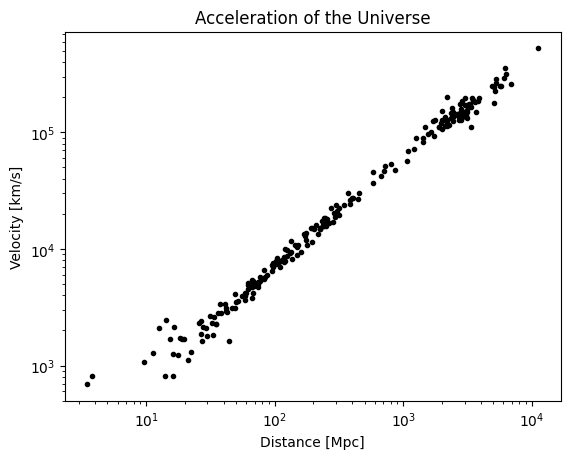

In [5]:
distance = 10**data["col8"] / 72.0 * u.mpc # This is the distance of the universe
velocity = 10**data["col7"] * u.km / u.s  # This is the velocity of the universe
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none") # This plots the data
plt.xscale("log") # This makes the x axis logarithmic
plt.yscale("log") # This makes the y axis logarithmic
plt.xlabel("Distance [Mpc]") # This is the x axis label
plt.ylabel("Velocity [km/s]") # This is the y axis label
plt.title("Acceleration of the Universe") # This is the title of the plot

In [6]:
distance_error = (10**(data["col8"]+data["col9"]) - 10**data["col8"]) / 72.0 * u.mpc

Text(0, 0.5, 'Velocity [km/s]')

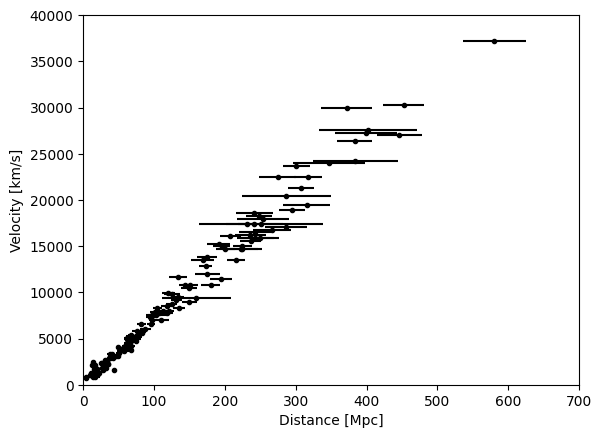

In [22]:
distance = 10**data["col8"] / 72.0 * u.mpc
velocity = 10**data["col7"] * u.km / u.s
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")


In [8]:
x = distance.to(u.mpc).value # This is the distance of the universe in Mpc
ind = np.where((x > 0) & (x < 700)) # This is the index of the data that is being used
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1) # This fits the data to a line
p = np.poly1d(z) # This is the line of best fit

In [9]:
Hubble_ConstantS = velocity / distance #  This calculates the hubble constant
print(Hubble_ConstantS) # This prints the hubble constant

[198.30446664  87.56539205 130.11653707 109.22762646 211.51077494
  53.62070212 111.25831965  59.33794428  69.87671764  68.44354514
  87.16306562  76.61829731  65.81615339  62.99883182 165.32270266
  82.47693178  72.          78.2226449   94.04430395  69.23608404
  79.12842044  89.39896615  65.81615339  70.84879961  77.32723769
  70.36107991  66.88557985  73.67709544  67.03976703  71.50435549
  62.56515091  49.46892768  75.04685492  74.530236    69.07684547
  78.58370422  68.75946619  64.02248049  69.23608404  77.32723769
  65.96787529  65.81615339  80.41415384  66.73174728  72.
  60.44111903  79.8605867   57.8538808   53.49737793  72.
  76.61829731  76.9719513   69.3956897   70.52327895  75.21985578
  85.76942458  59.06531119  58.65870845  59.33794428  52.03942586
  70.36107991  69.07684547  53.62070212  65.36307817  73.16990589
  71.01212297  79.8605867   60.86007685  71.50435549  63.58175283
  47.56992826  45.32444517  40.76922881  65.66478043  61.00037382
  64.02248049  55.50504977

Text(50, 30000, '$H_0$= 67.48 km/s/Mpc')

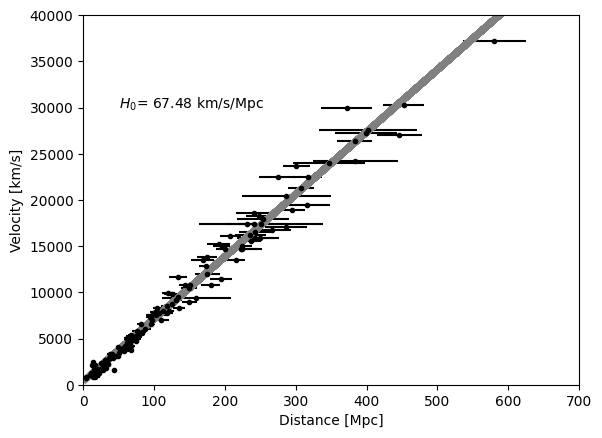

In [10]:
velocity_model = p(distance.to(u.mpc).value) # This is the model of the velocity
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(distance.to(u.mpc).value, velocity_model, color="grey", linewidth=5)
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate(r"$H_0$= {0:5.2f} km/s/Mpc".format(z[0]), xy=(50, 30000))

In [11]:
average = np.average(Hubble_ConstantS) # This calculates the average of the hubble constant
print(average) # This prints the average of the hubble constant in km/(mpc s)

67.7316752356907 km / (mpc s)


Age of universe ≈ $\frac{1}{H_0}$

In [12]:
hubble_constant = 67.7316752356907 * (u.km / u.s / u.Mpc) # defines the hubble constant
age_of_universe = (1 / hubble_constant).to(u.year) # calculate the age of the universe and turns it into years
print(age_of_universe) # prints the age of the universe in years
print(hubble_constant) # prints the hubble constant in km/(mpc s)

14436262181.295479 yr
67.7316752356907 km / (Mpc s)


In [13]:
age_of_universe2 = (1 / (67.48 * (u.km/u.s/u.Mpc))).to(u.yr) # calculate the age of the universe and turns it into yr
print(age_of_universe2) # prints the age of the universe in yr

14490104055.731909 yr


In [14]:
14490104055.731909 - 14436262181.295479 # This is the difference between both age of the universe in years

53841874.43642998

This amounts to 53 million or 53841874.43642998 which is a significant amount for the years. The problem is that slope is more accurate because it isn't as affect by the outliers like the slope is which helps give a more precise measurement.

In [15]:
# prompt: chi reduced squared formula input values above

def reduced_chi_squared(observed, model, errors): # This is the formula for the chi squared
  """Calculates the reduced chi-squared statistic.

  Args:
    observed: Array of observed data.
    model: Array of model predictions.
    errors: Array of uncertainties in the observed data.

  Returns:
    The reduced chi-squared statistic.
  """
  chi_squared = np.sum(((observed - model) / errors)**2)
  len(observed)
  z = np.polyfit(observed, model, 1) # This is the formula for the reduced chi squared
  degrees_of_freedom = len(observed) - len(z)
  return chi_squared / degrees_of_freedom


# Assuming you have your data and model already defined
# Example: observed = velocity.to(u.km / u.s).value[ind]
#         model = velocity_model[ind]
#         errors = np.array(
#             [distance_error.to(u.mpc).value[i] for i in ind])

reduced_chi_sq = reduced_chi_squared(
    velocity.to(u.km / u.s).value[ind], velocity_model[ind], # This is the formula for the chi squared
    np.array([distance_error.to(u.mpc).value[i] for i in ind])) # array for the error bar

print(f"Reduced Chi-Squared: {reduced_chi_sq}")

# This number was way to big because for a reduced chi squared the closer to 1 it is the more accurate your data, formula and graph are
# and it shows if it fits well in the data.

Reduced Chi-Squared: 30553.68959486419


In [19]:
observed = velocity.to(u.km / u.s).value[ind]  # Observed values

if hasattr(velocity_model, 'unit'):  # Check if velocity_model is an Astropy Quantity
    model = velocity_model[ind].to(u.km / u.s).value  # Convert to km/s if it's a Quantity
else:
    model = velocity_model[ind]  # Assume it's already in km/s if it's not a Quantity

# Define velocity error as a percentage of observed values
percentage_error = 5  # Replace with your actual percentage error estimate
velocity_error = (percentage_error / 100) * observed * u.km / u.s  # Velocity errors based on observed values

errors = velocity_error.to(u.km / u.s).value  # Convert errors to km/s if needed

reduced_chi_sq = reduced_chi_squared(observed, model, errors)  # This is the formula for the chi squared
print(f"Reduced Chi-Squared: {reduced_chi_sq}")  # Print the reduced chi-squared value
# This gave a smaller reduced chi squared which shows that the data is more accurate

Reduced Chi-Squared: 13.52455005206
